In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read data into DataFrame from CSV file
# cyclone_df = pd.read_csv("Cyclone_ML.csv")
cyclone_df = pd.read_csv("data/Cyclone_ML.csv")

# Select features for machine learning and assign to X
selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD", "CENTRAL_INDEX (CI)", "WAVE_HEIGHT"]]
# selected_features = cyclone_df[["CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD"]]
X = selected_features

# Set y to compass direction of cyclone based on wind direction degree
y = cyclone_df["WIND_COMPASS"]
# y = cyclone_df["MAX_REP_WIND_DIR"]
 

print(X.shape, y.shape)
    

(1692, 8) (1692,)


In [6]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD,CENTRAL_INDEX (CI),WAVE_HEIGHT
0,3.0,40.0,-19.00,146.40,952.0,46.3,5.051994,11.079868
1,1.0,20.0,-11.00,92.60,1001.0,12.9,2.064005,3.337484
2,1.0,20.0,-11.10,93.10,1002.0,12.9,1.950454,3.093691
3,1.0,20.0,-11.10,94.20,1003.0,12.9,1.829259,2.838769
4,1.0,20.0,-11.10,94.60,1000.0,12.9,2.171169,3.571799
...,...,...,...,...,...,...,...,...
1687,2.0,30.0,-14.30,126.40,986.0,20.6,3.306407,6.276868
1688,4.0,21.0,-12.73,130.61,999.0,20.6,2.272897,3.797903
1689,2.0,30.0,-12.54,130.72,993.0,18.0,2.801605,5.026852
1690,2.0,30.0,-12.41,130.99,995.0,18.0,2.638106,4.637562


In [7]:
y

0       SE
1        E
2        E
3        S
4       SW
        ..
1687     W
1688     N
1689    SW
1690    SW
1691    SW
Name: WIND_COMPASS, Length: 1692, dtype: object

In [8]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
training_score = rf.score(X_train_scaled, y_train)
testing_score = rf.score(X_test_scaled, y_test)
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.9976359338061466
Testing Data Score: 0.3475177304964539


In [11]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.28686925889312537, 'LON'),
 (0.2604157413406477, 'LAT'),
 (0.10781402491047115, 'MAX_WIND_SPD'),
 (0.09852947998024211, 'CENTRAL_PRES'),
 (0.0980374014017895, 'CENTRAL_INDEX (CI)'),
 (0.09781041852342211, 'WAVE_HEIGHT'),
 (0.027784592934856224, 'SURFACE_CODE'),
 (0.022739082015445708, 'CYC_TYPE')]

In [13]:
# Make predictions with the model
predictions = rf.predict(X_test_scaled)

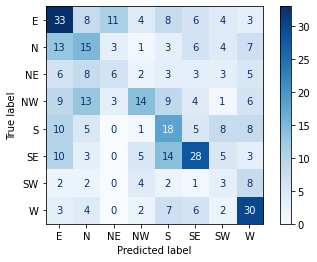

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_scaled, y_test, cmap="Blues")
plt.show()

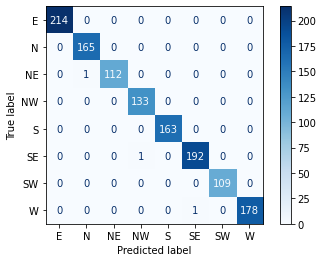

In [15]:
plot_confusion_matrix(rf, X_train_scaled, y_train, cmap="Blues")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["E", "N", "NE", "NW", "S", "SE", "SW", "W"]))

              precision    recall  f1-score   support

           E       0.38      0.43      0.40        77
           N       0.26      0.29      0.27        52
          NE       0.26      0.17      0.20        36
          NW       0.42      0.24      0.30        59
           S       0.28      0.33      0.30        55
          SE       0.47      0.41      0.44        68
          SW       0.10      0.14      0.12        22
           W       0.43      0.56      0.48        54

    accuracy                           0.35       423
   macro avg       0.33      0.32      0.32       423
weighted avg       0.36      0.35      0.34       423



In [17]:
joblib.dump(rf, 'cyclone_RF.smd')
print("Model is saved.")

Model is saved.


In [18]:
joblib.dump(rf, '../cyclone_RF.smd')
print("Model is saved.")

Model is saved.
